In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# DATA PREPARATION 

In [2]:
# Read a CSV file located at "D:/Downloads/loan_data_2007_2014.csv" and store its contents in a DataFrame named 'df
df=pd.read_csv("D:/Downloads/loan_data_2007_2014.csv")
# Display the DataFrame 'df', which shows the contents of the CSV file
df

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


checking data type

In [3]:
# Call the .info() method on the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

remove data Unnamed: 0

In [4]:
# Remove the column named "Unnamed: 0" from the DataFrame 'df' and create a new DataFrame 'df'
df = df.drop("Unnamed: 0", axis=1)
# Display information about the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

Creating summary statistics for categorical and numeric data.

In [5]:
# Select columns with the data type 'object' from the DataFrame 'df'
category = df.select_dtypes(include=["object"])
# Generate a summary description for the selected columns and transpose the result
category.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [6]:
# Select columns with numeric data types using NumPy's np.number
numeric = df.select_dtypes(include=np.number)
# Generate a summary description for the selected numeric columns and transpose the result
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


Checking and Removing Missing Value

In [7]:
# Define a function called missing_value_table that takes a DataFrame df as input
def missing_value_table(df):
    # Calculate the total count of missing values for each column and sort them in descending order
    missing_value = df.isna().sum().sort_values(ascending=False)
    # Calculate the percentage of missing values for each column
    missing_value_percent = 100 * df.isna().sum() // len(df)
    # Combine the missing value counts and percentages into a single DataFrame
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    # Rename the columns of the resulting DataFrame
    missing_value_table_return = missing_value_table.rename(columns={0: 'Missing Values', 1: '% Value'})
    # Create a color map (cmap) for styling
    cm = sns.light_palette("blue", as_cmap=True)
    # Apply background gradient styling to the DataFrame using the color map
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    # Return the styled missing value table
    return missing_value_table_return
# Call the missing_value_table function on the DataFrame 'df' and display the result
missing_value_table(df)

,Missing Values,% Value
inq_last_12m,466285,100
verification_status_joint,466285,100
open_acc_6m,466285,100
open_il_6m,466285,100
open_il_12m,466285,100
open_il_24m,466285,100
mths_since_rcnt_il,466285,100
dti_joint,466285,100
total_bal_il,466285,100
annual_inc_joint,466285,100


In [8]:
# Remove columns with all null (missing) values from the DataFrame 'df'
df1 = df.dropna(axis=1, how="all")
# Display information about the modified DataFrame 'df1'
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [9]:
# Calculate the percentage of missing values for each column
missing_percent = (df1.isna().sum() / len(df1)) * 100

# Identify columns with missing values exceeding 30%
columns_to_drop = missing_percent[missing_percent > 30].index

# Remove those columns from the DataFrame
df_cleaned = df1.drop(columns=columns_to_drop)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   term                        466285 non-null  object 
 6   int_rate                    466285 non-null  float64
 7   installment                 466285 non-null  float64
 8   grade                       466285 non-null  object 
 9   sub_grade                   466285 non-null  object 
 10  emp_title                   438697 non-null  object 
 11  emp_length                  445277 non-null  object 
 12  home_ownership              466285 non-null  object 
 13  annual_inc    

In [10]:
# Define a function called missing_value_table that takes a cleaned DataFrame df_cleaned as input
def missing_value_table(df_cleaned):
    # Calculate the total count of missing values for each column and sort them in descending order
    missing_value = df_cleaned.isna().sum().sort_values(ascending=False)
    # Calculate the percentage of missing values for each column
    missing_value_percent = 100 * df_cleaned.isna().sum() // len(df)
    # Combine the missing value counts and percentages into a single DataFrame
    missing_value_table = pd.concat([missing_value, missing_value_percent], axis=1)
    # Rename the columns of the resulting DataFrame
    missing_value_table_return = missing_value_table.rename(columns={0: 'Missing Values', 1: '% Value'})
    # Create a color map (cmap) for styling
    cm = sns.light_palette("blue", as_cmap=True)
    # Apply background gradient styling to the DataFrame using the color map
    missing_value_table_return = missing_value_table_return.style.background_gradient(cmap=cm)
    # Return the styled missing value table
    return missing_value_table_return
# Call the missing_value_table function on the cleaned DataFrame 'df_cleaned' and display the result
missing_value_table(df_cleaned)

,Missing Values,% Value
total_rev_hi_lim,70276,15
tot_cur_bal,70276,15
tot_coll_amt,70276,15
emp_title,27588,5
emp_length,21008,4
last_pymnt_d,376,0
revol_util,340,0
collections_12_mths_ex_med,145,0
last_credit_pull_d,42,0
delinq_2yrs,29,0


In [11]:
# Select columns with data type 'object' from the DataFrame 'df_cleaned' and store their column names in a list.
cat_col = df_cleaned.select_dtypes(include=["object"]).columns.tolist()
# Define a list of columns to be removed from the 'cat_col' list.
remove_col = ["desc", "next_pymnt_d"]
# Remove columns from 'cat_col' if they are in the 'remove_col' list.
cat_col = [col for col in cat_col if col not in remove_col]
# Convert the remaining columns in the DataFrame 'df_cleaned' to the string data type.
df_cleaned[cat_col] = df_cleaned[cat_col].astype(str)

In [12]:
# Select numerical columns (columns with data type 'number') from the DataFrame,and exclude the "id" and "member_id" columns. Then, convert the column names to a list.
num_col = df_cleaned.select_dtypes(include=np.number).drop(["id", "member_id"], axis=1).columns.tolist()
# Select categorical columns (columns with data type 'object') from the DataFrame and convert the column names to a list.
cat_col = df_cleaned.select_dtypes(include=["object"]).columns.tolist()
# Select all numerical columns (including those dropped earlier) from the DataFrame.
num = df_cleaned.select_dtypes(include=np.number).drop(["id", "member_id"], axis=1)
# Select all categorical columns from the DataFrame.
cat = df_cleaned.select_dtypes(include=["object"])

In [13]:
# Iterate through each numerical column in the 'num_col' list.
for i in num_col:
    df_cleaned[i].fillna(df[i].mean(), inplace=True)

# Iterate through each categorical column in the 'cat_col' list.
for i in cat_col:
    df_cleaned[i].fillna(df[i].mode()[0], inplace=True)

In [14]:
# Removing feature that contain only 1 unique value and lots of unique values
dum = pd.DataFrame({"Unique" : df_cleaned.nunique(),
                    "Type" : df_cleaned.dtypes})
cat_dum = dum[dum["Type"] == "object"]
sing_val = dum[dum["Unique"] == 1].index.to_list()
lots_val = cat_dum[cat_dum["Unique"] > 20].index.to_list()
remove_col = sing_val + lots_val
df_cleaned.drop(remove_col, axis = 1, inplace = True)

In [15]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          466285 non-null  int64  
 1   member_id                   466285 non-null  int64  
 2   loan_amnt                   466285 non-null  int64  
 3   funded_amnt                 466285 non-null  int64  
 4   funded_amnt_inv             466285 non-null  float64
 5   term                        466285 non-null  object 
 6   int_rate                    466285 non-null  float64
 7   installment                 466285 non-null  float64
 8   grade                       466285 non-null  object 
 9   emp_length                  466285 non-null  object 
 10  home_ownership              466285 non-null  object 
 11  annual_inc                  466285 non-null  float64
 12  verification_status         466285 non-null  object 
 13  loan_status   

# Data Visualization

checking the loan_status plot

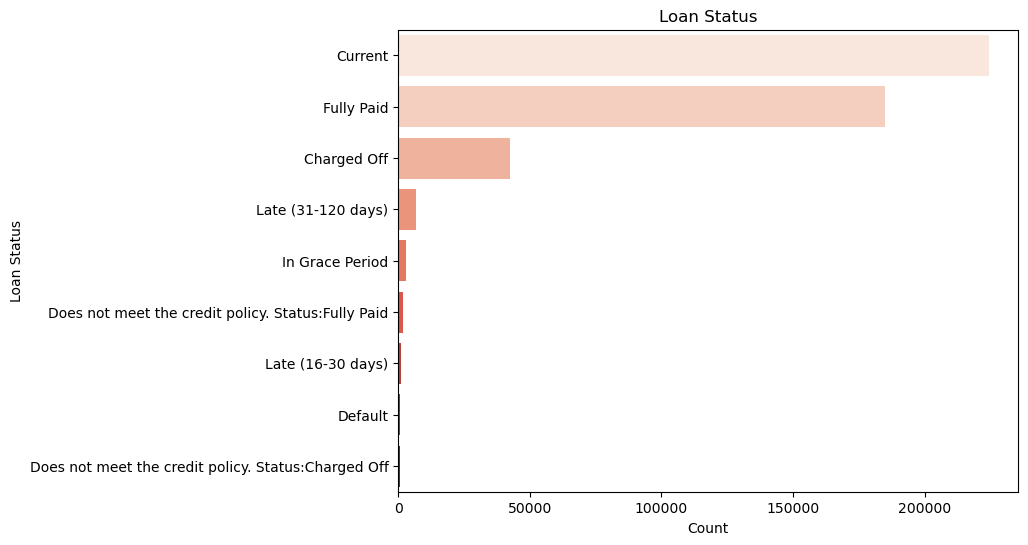

Distribution: 
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64 

Raw Count: 
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid 

In [16]:
# Create a new figure with a specific size (8 inches in width and 6 inches in height).
plt.figure(figsize=(8, 6))
# Create a countplot using seaborn (sns) to visualize the distribution of 'loan_status'.
loan_status_counts = df_cleaned["loan_status"].value_counts()
loan_status_counts = loan_status_counts.sort_values(ascending=False)
sns.countplot(data=df_cleaned, y="loan_status", order=loan_status_counts.index, palette="Reds")
# Set the title for the plot.
plt.title("Label counts", fontsize="x-large")
# Set labels for the x and y axes.
plt.xlabel("Count")
plt.ylabel("Loan Status")
plt.title("Loan Status")
# Display the plot.
plt.show()
# Print the distribution and raw counts of loan statuses.
print(f'Distribution: \n{df_cleaned["loan_status"].value_counts(normalize=True)} \n')
print(f'Raw Count: \n{df_cleaned["loan_status"].value_counts(normalize=False)} \n')

Description:
* Current: In the context of loan status, "Current" means that the borrower is making payments on time. They are up-to-date with their loan payments and have not missed any payments.

* Fully Paid: "Fully Paid" indicates that the loan has been completely repaid. This can happen either at the expiration of the loan's term (e.g., a 3- or 5-year term) or as a result of a prepayment where the borrower pays off the loan before the scheduled term.

* Charged-Off: When a loan is "Charged-Off," it means that the lender or creditor has written off the account as a loss. This typically occurs when it is unlikely that the remaining balance of the loan will be recovered, and the account is closed to future charges.

* Grace Period: A "Grace Period" is a set number of days after the due date during which a payment may be made by the borrower without incurring any penalty. It provides borrowers with a brief window of time to make a late payment without facing additional charges.

* Default: "Default" signifies that the loan has not been kept current for an extended period of time. Borrowers who are in default have failed to meet their payment obligations over an extended duration, often resulting in serious consequences, such as legal actions by the lender.

* Late: "Late" means the borrower has failed to make a payment on time. It typically refers to situations where a borrower misses a payment within the grace period after the due date, indicating a temporary delay in making the payment.

For further analysis, categorization is done into 2 categories:
* Bad (0): Charged Off, Default, Late (16-30 days), Late (31-120 days), Does not meet the credit policy. Status:Fully Paid, Does not meet the credit policy. Status:Charged Off
* Good (1): Current, Fully Paid, In Grace Period

In [17]:
# Define two lists 'class_0' and 'class_1' to represent loan status categories.
class_0 = ["Charged Off", "Default", "Late (16-30 days)", "Late (31-120 days)", "Does not meet the credit policy. Status:Fully Paid", "Does not meet the credit policy. Status:Charged Off"]
class_1 = ["Current", "Fully Paid", "In Grace Period"]

# Define a function 'change_status' that takes a loan status ('x') as input.
def change_status(x):
    if x in class_0:
        return 0
    elif x in class_1:
        return 1

# Apply the 'change_status' function to the 'loan_status' column of the DataFrame 'df_cleaned'.
df_cleaned["loan_status"] = df_cleaned["loan_status"].apply(change_status)

# Convert the 'loan_status' column to the string data type.
df_cleaned["loan_status"] = df_cleaned["loan_status"].astype(str)

In [18]:
df_cleaned['loan_status'].value_counts()

1    412111
0     54174
Name: loan_status, dtype: int64

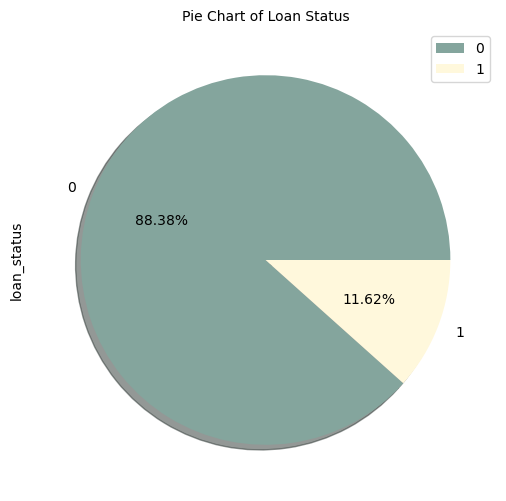

In [19]:
plt.figure(figsize=(8, 6))
# Define colors for the pie chart (hexadecimal color codes)
colors = ('#84a59d', '#FFF8DC')
# Define the 'explode' parameter to separate a slice from the pie (1st slice exploded)
explode = (0.1, 0,)
# Calculate the counts of different loan statuses and store them in the 'Type' variable
Type = df_cleaned['loan_status'].value_counts()
# Define labels for the pie chart (in this case, '0' and '1')
labels = ['0', '1']
# Create a pie chart with the specified settings:
Type.plot.pie(autopct='%.2f%%', shadow=True, colors=colors, legend=True, labels=labels)
# Set the title for the pie chart
plt.title('Pie Chart of Loan Status', fontsize=10)
# Display the pie chart
plt.show()

Checking the count of data with the object data type

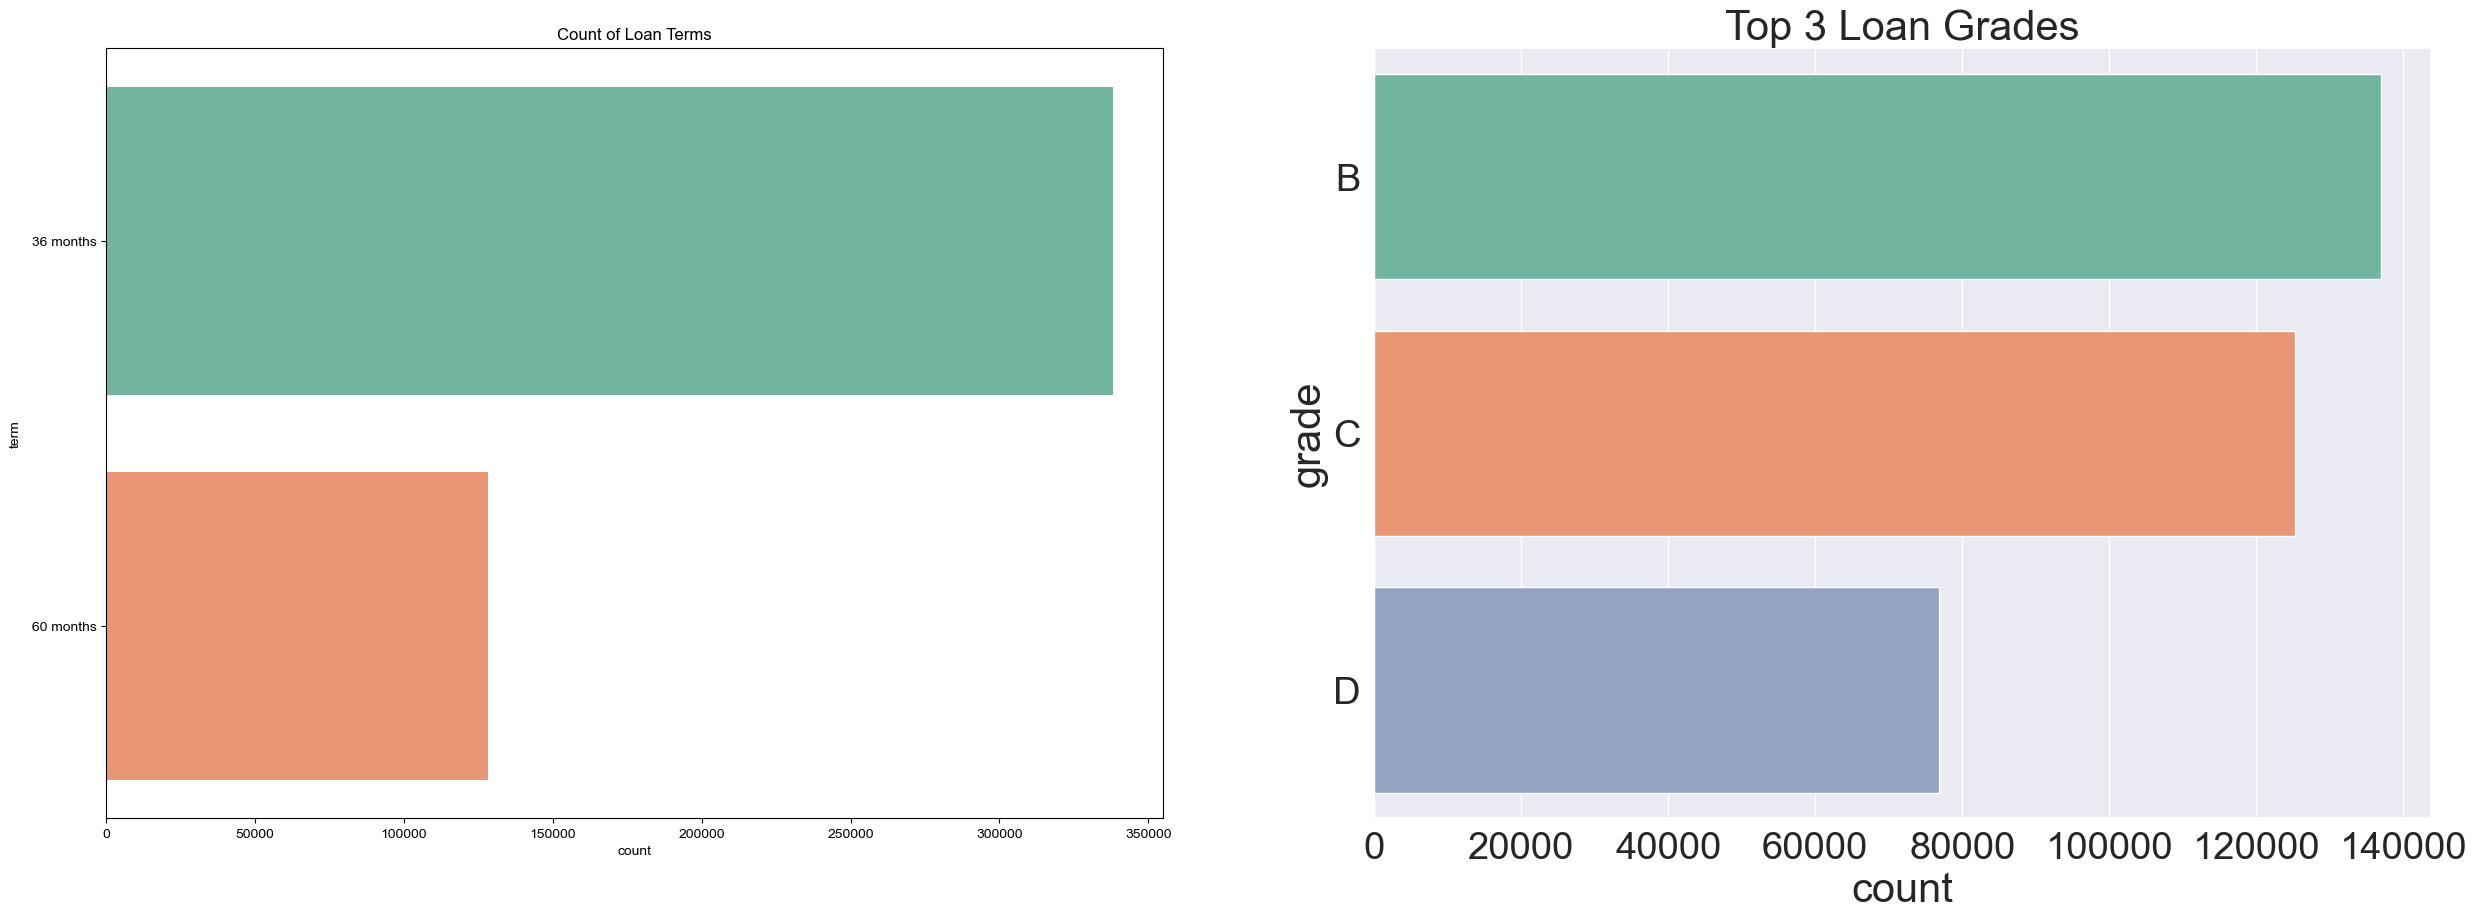

In [20]:
# Creating a figure and axes for the plot with a specified size
fig, ax = plt.subplots(figsize=(30, 10))
# Creating the first subplot in a 1x2 grid (1 row, 2 columns)
plt.subplot(1, 2, 1)
# Creating a countplot of the "term" column from the DataFrame "df_cleaned"
sns.countplot(y="term", order=df_cleaned["term"].value_counts().index, data=df_cleaned, palette="Set2")
# Setting a title for the first subplot
plt.title("Count of Loan Terms")
sns.set(font_scale=2.5)
# Creating the second subplot in a 1x2 grid (1 row, 2 columns)
plt.subplot(1, 2, 2)
# Creating a countplot of the "grade" column from the DataFrame "df_cleaned""
sns.countplot(y="grade", order=df_cleaned["grade"].value_counts().iloc[:3].index, data=df_cleaned, palette="Set2")
# Setting a title for the second subplot
plt.title("Top 3 Loan Grades")
sns.set(font_scale=2)
# Displaying the entire plot with both subplots
plt.show()

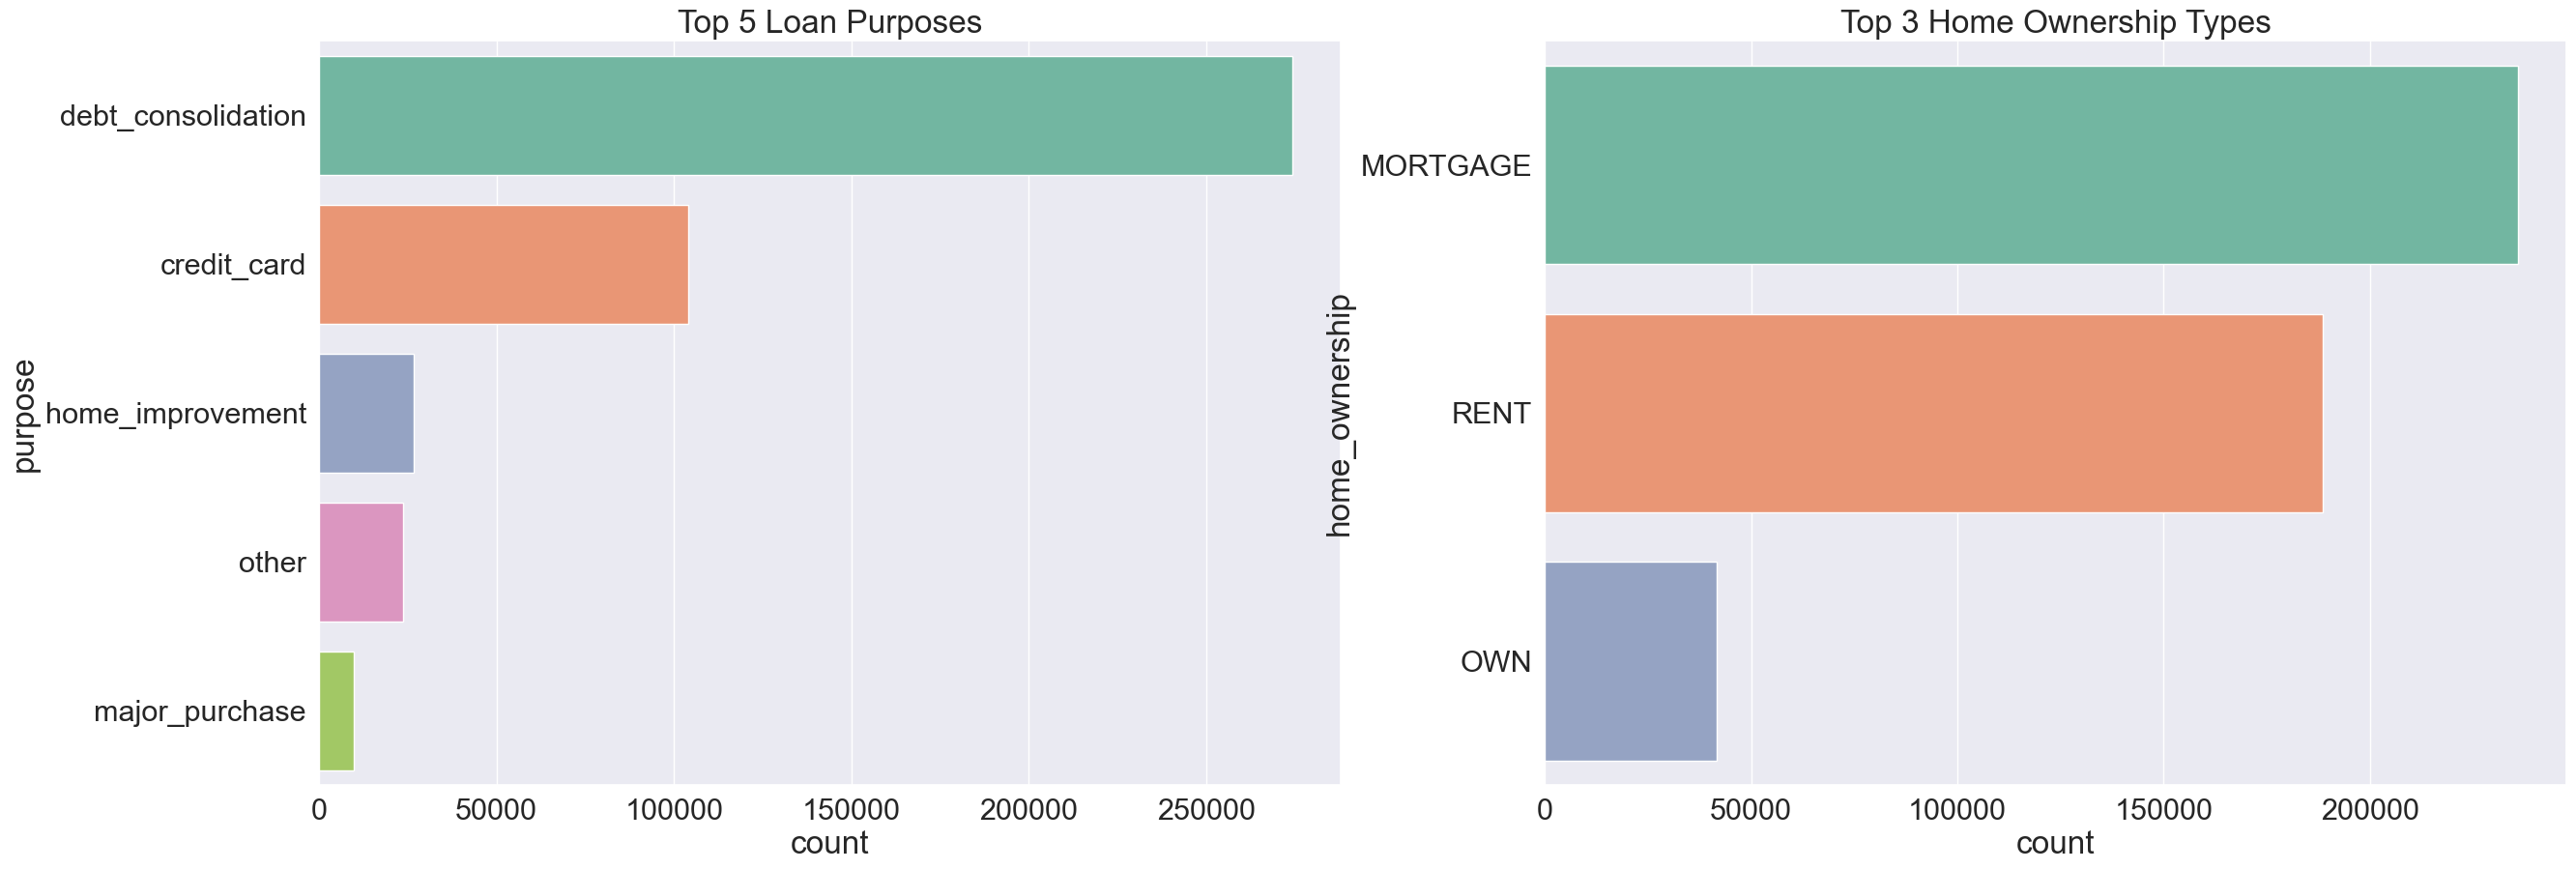

In [21]:
# Creating a figure and axes for the plot with a specified size (30 units wide, 10 units tall)
fig, ax = plt.subplots(figsize=(30, 10))
# Creating the first subplot in a 1x2 grid (1 row, 2 columns)
plt.subplot(1, 2, 1)
# Creating a countplot of the "purpose" column from the DataFrame "df_cleaned"
sns.countplot(y="purpose", order=df_cleaned["purpose"].value_counts().iloc[:5].index, data=df_cleaned, palette="Set2")
# Setting a title for the first subplot
plt.title("Top 5 Loan Purposes")
sns.set(font_scale=2)
# Creating the second subplot in a 1x2 grid (1 row, 2 columns)
plt.subplot(1, 2, 2)
# Creating a countplot of the "home_ownership" column from the DataFrame "df_cleaned"
sns.countplot(y="home_ownership", order=df_cleaned["home_ownership"].value_counts().iloc[:3].index, data=df_cleaned, palette="Set2")
# Setting a title for the second subplot
plt.title("Top 3 Home Ownership Types")
sns.set(font_scale=2)
# Displaying the entire plot with both subplots
plt.show()

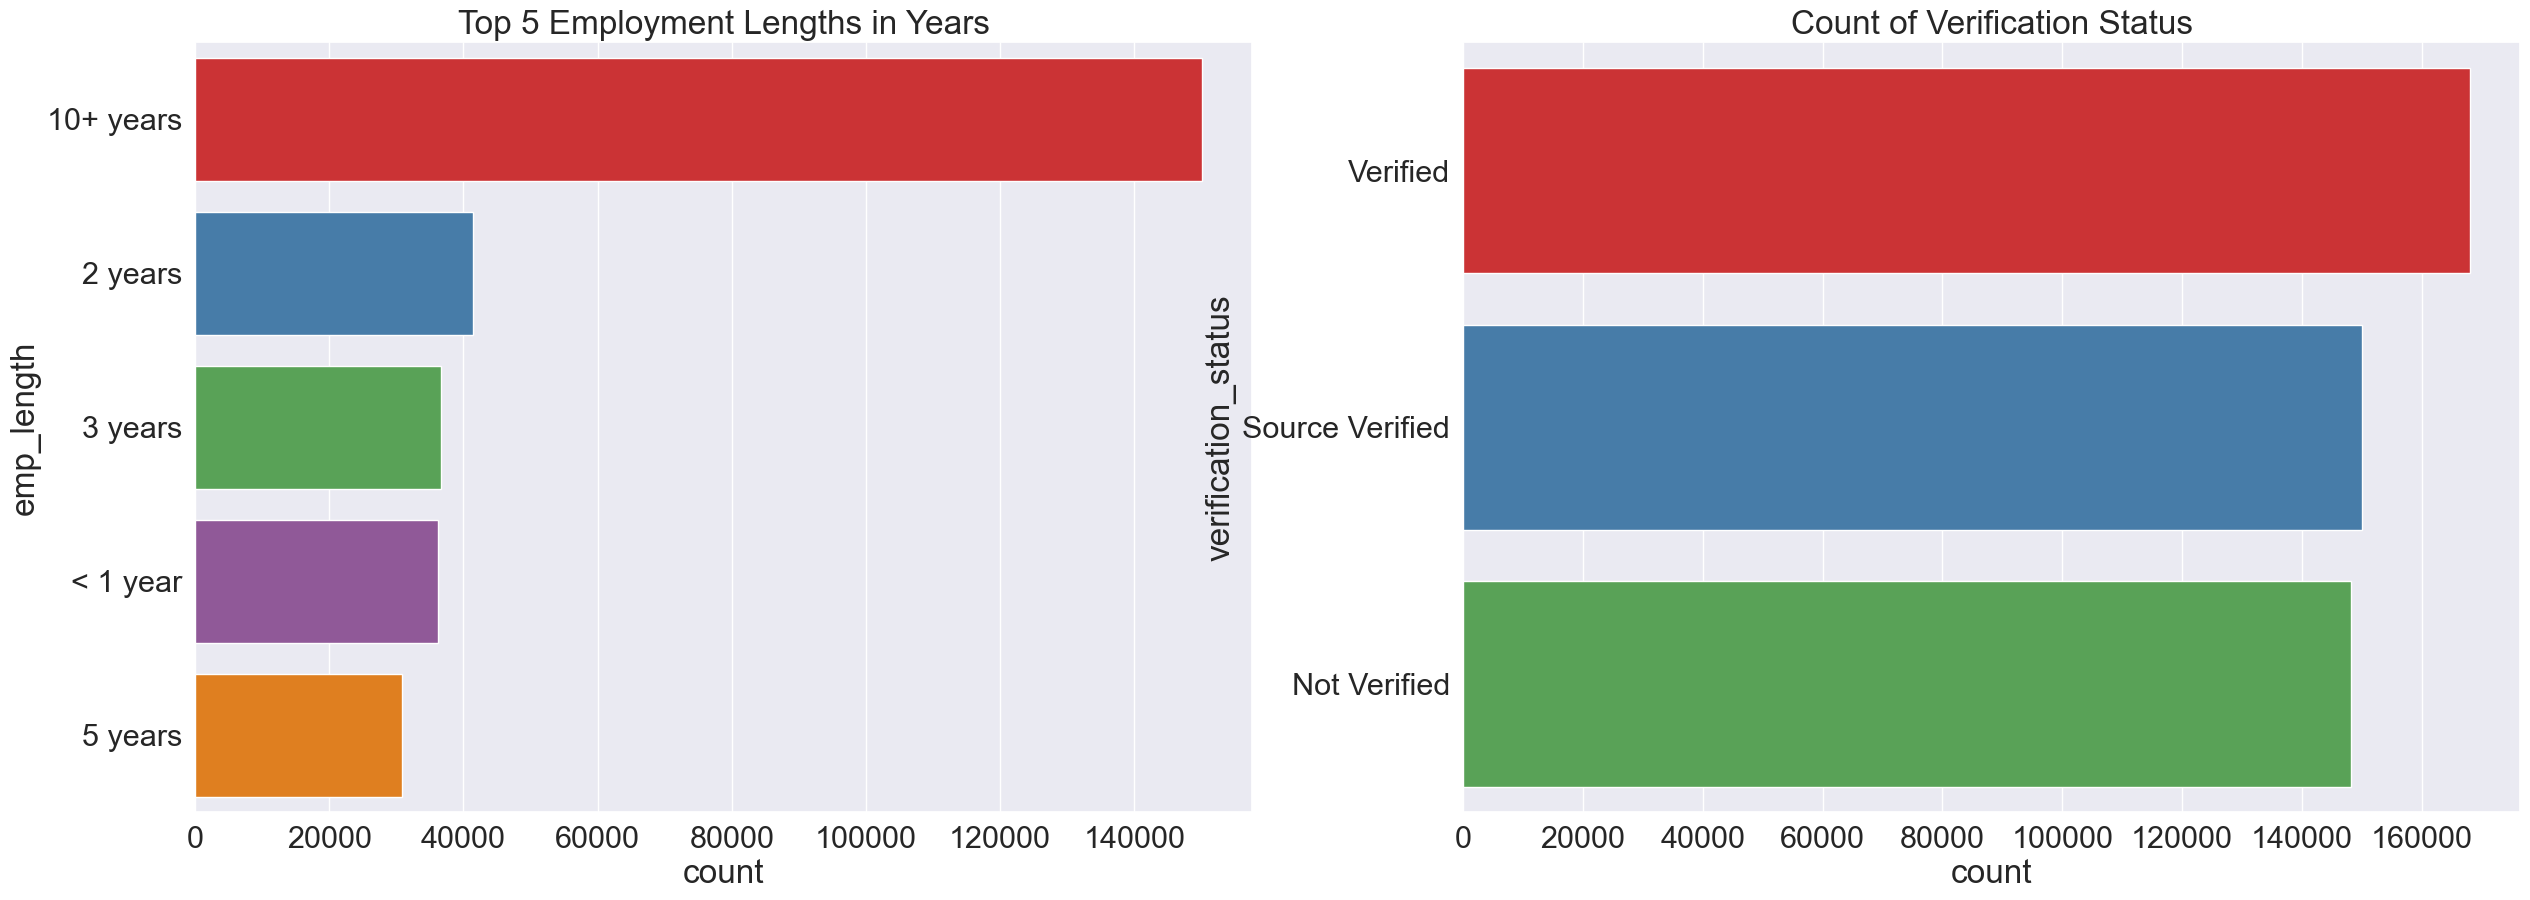

In [22]:
# Creating a figure and axes for the plot with a specified size (30 units wide, 10 units tall)
fig, ax = plt.subplots(figsize=(30, 10))
# Creating the first subplot in a 1x2 grid (1 row, 2 columns)
plt.subplot(1, 2, 1)
# Creating a countplot of the "emp_length" column from the DataFrame "df_cleaned"
sns.countplot(y="emp_length", order=df_cleaned["emp_length"].value_counts().iloc[:5].index, data=df_cleaned, palette="Set1")
# Setting a title for the first subplot
plt.title("Top 5 Employment Lengths in Years")
sns.set(font_scale=2)
# Creating the second subplot in a 1x2 grid (1 row, 2 columns)
plt.subplot(1, 2, 2)
# Creating a countplot of the "verification_status" column from the DataFrame "df_cleaned"
sns.countplot(y="verification_status", order=df_cleaned["verification_status"].value_counts().iloc[:3].index, data=df_cleaned, palette="Set1")
# Setting a title for the second subplot
plt.title("Count of Verification Status")
sns.set(font_scale=2)
# Displaying the entire plot with both subplots
plt.show()

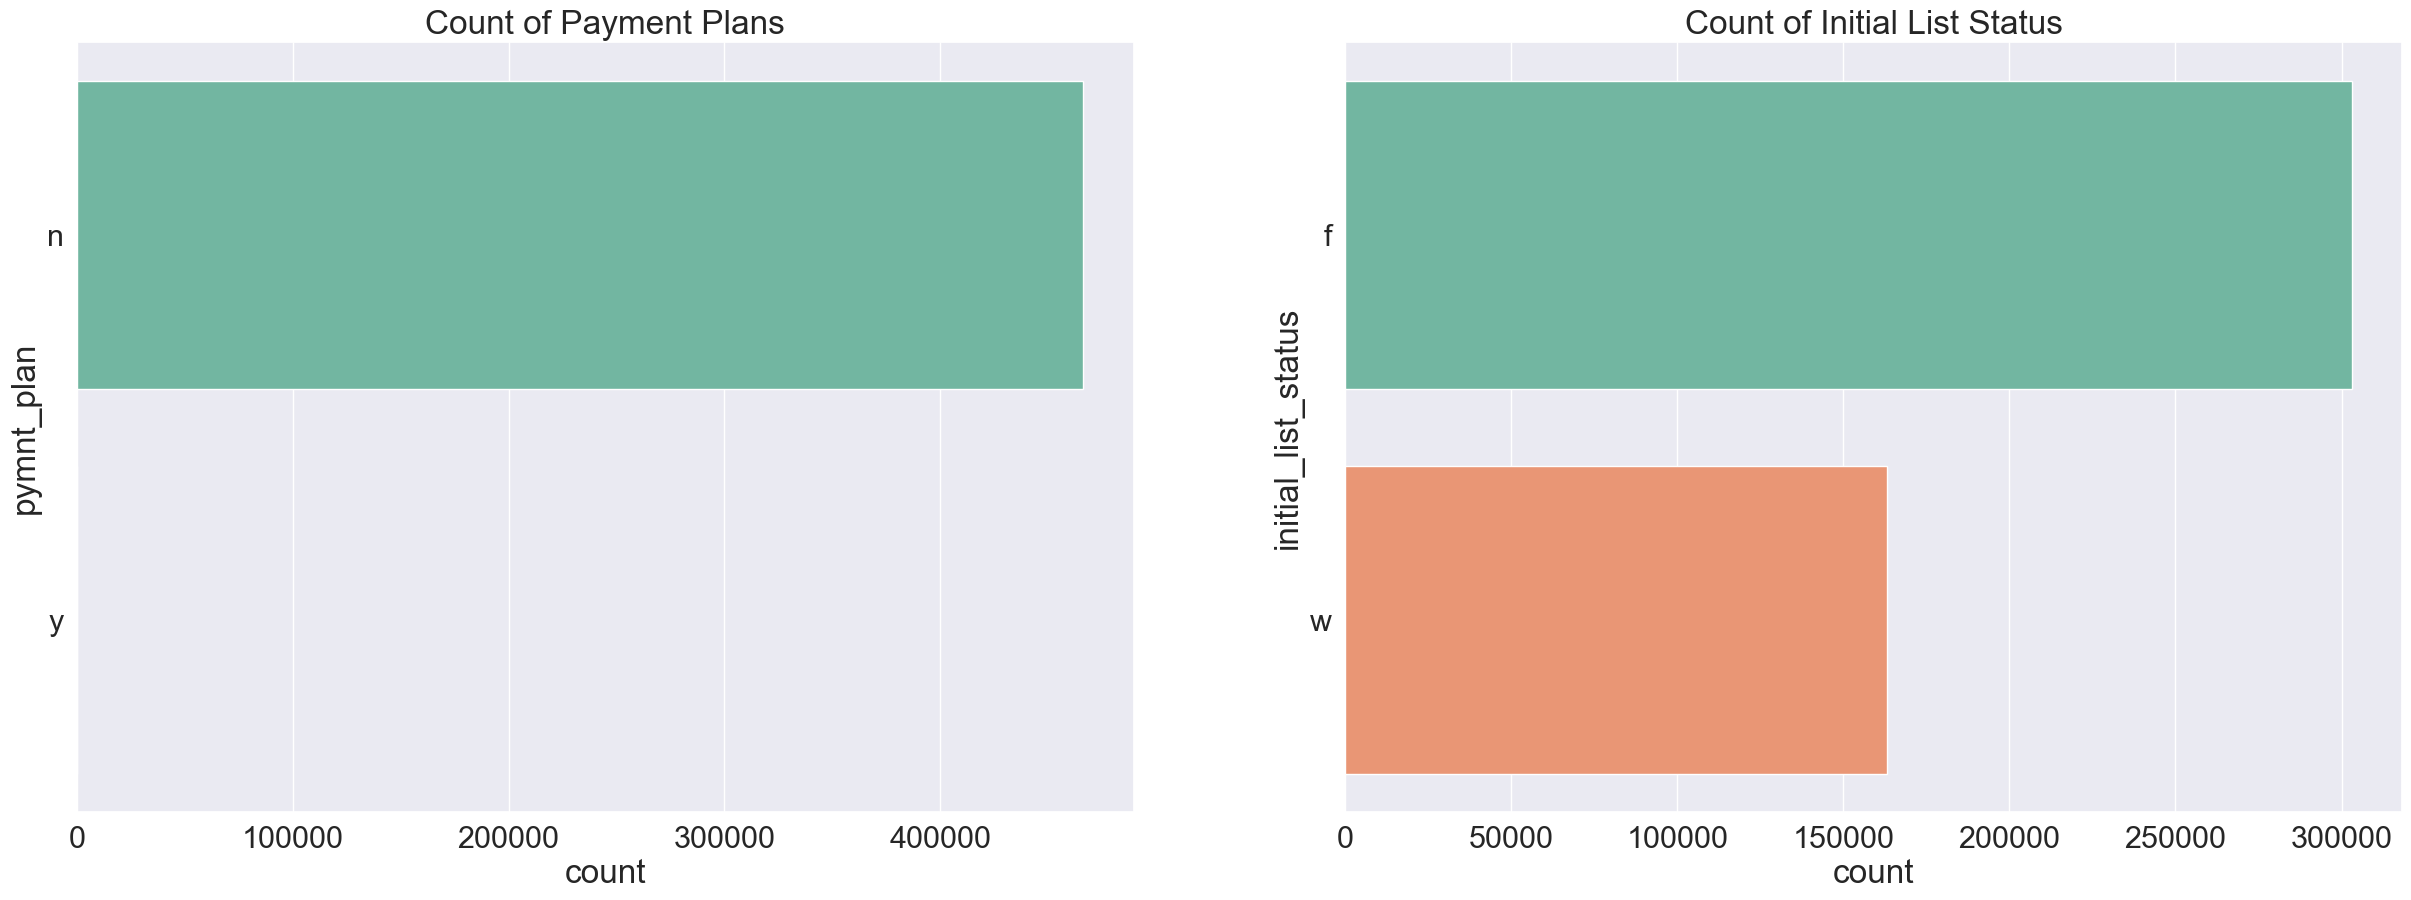

In [23]:
# Creating a figure and axes for the plot with a specified size (30 units wide, 10 units tall)
fig, ax = plt.subplots(figsize=(30, 10))
# Creating the first subplot in a 1x2 grid (1 row, 2 columns)
plt.subplot(1, 2, 1)
# Creating a countplot of the "pymnt_plan" column from the DataFrame "df_cleaned"
sns.countplot(y="pymnt_plan", order=df_cleaned["pymnt_plan"].value_counts().index, data=df_cleaned, palette="Set2")
# Setting a title for the first subplot
plt.title("Count of Payment Plans")
sns.set(font_scale=2)
# Creating the second subplot in a 1x2 grid (1 row, 2 columns)
plt.subplot(1, 2, 2)
# Creating a countplot of the "initial_list_status" column from the DataFrame "df_cleaned"
sns.countplot(y="initial_list_status", order=df_cleaned["initial_list_status"].value_counts().index, data=df_cleaned, palette="Set2")
# Setting a title for the second subplot
plt.title("Count of Initial List Status")
sns.set(font_scale=2)
# Displaying the entire plot with both subplots
plt.show()

# Feature Selection

Data normalization

In [24]:
# Create a LabelEncoder object for encoding categorical labels
label = LabelEncoder()
# Create a StandardScaler object for data normalization
stand = StandardScaler()
# Normalize numeric columns using StandardScaler
df_cleaned[df_cleaned.select_dtypes(include=np.number).columns.tolist()] = stand.fit_transform(df_cleaned[df_cleaned.select_dtypes(include=np.number).columns.tolist()])
# Encode categorical columns using LabelEncoder
df_cleaned[df_cleaned.select_dtypes(include=["object"]).columns.tolist()] = df_cleaned[df_cleaned.select_dtypes(include=["object"]).columns.tolist()].apply(label.fit_transform)

In [25]:
# Create feature matrix X by dropping specific columns from df_cleaned
X = df_cleaned.drop(["loan_status", "id", "member_id"], axis=1)
# Create target vector y containing only the "loan_status" column from df_cleaned
y = df_cleaned["loan_status"]

Finding the best features.

In [26]:
# Perform feature selection using SelectKBest
select = SelectKBest(f_classif, k="all").fit(X, y)
# Transform the data based on selected features
data = select.fit_transform(X, y)
# Create a DataFrame to display feature scores
selected = pd.DataFrame({"Feature": list(X.columns), "Scores": select.scores_})
# Sort the DataFrame by feature scores in descending order
selected = selected.sort_values(by="Scores", ascending=False)
# Display the top 10 selected features
selected.head(10)

,Feature,Scores
29,recoveries,103535.945653
30,collection_recovery_fee,42530.696838
26,total_rec_prncp,31218.364597
25,total_pymnt_inv,18906.711206
24,total_pymnt,17935.972159
6,grade,14903.405557
4,int_rate,14263.185204
31,last_pymnt_amnt,13822.553202
22,out_prncp,11821.553792
23,out_prncp_inv,11819.569556


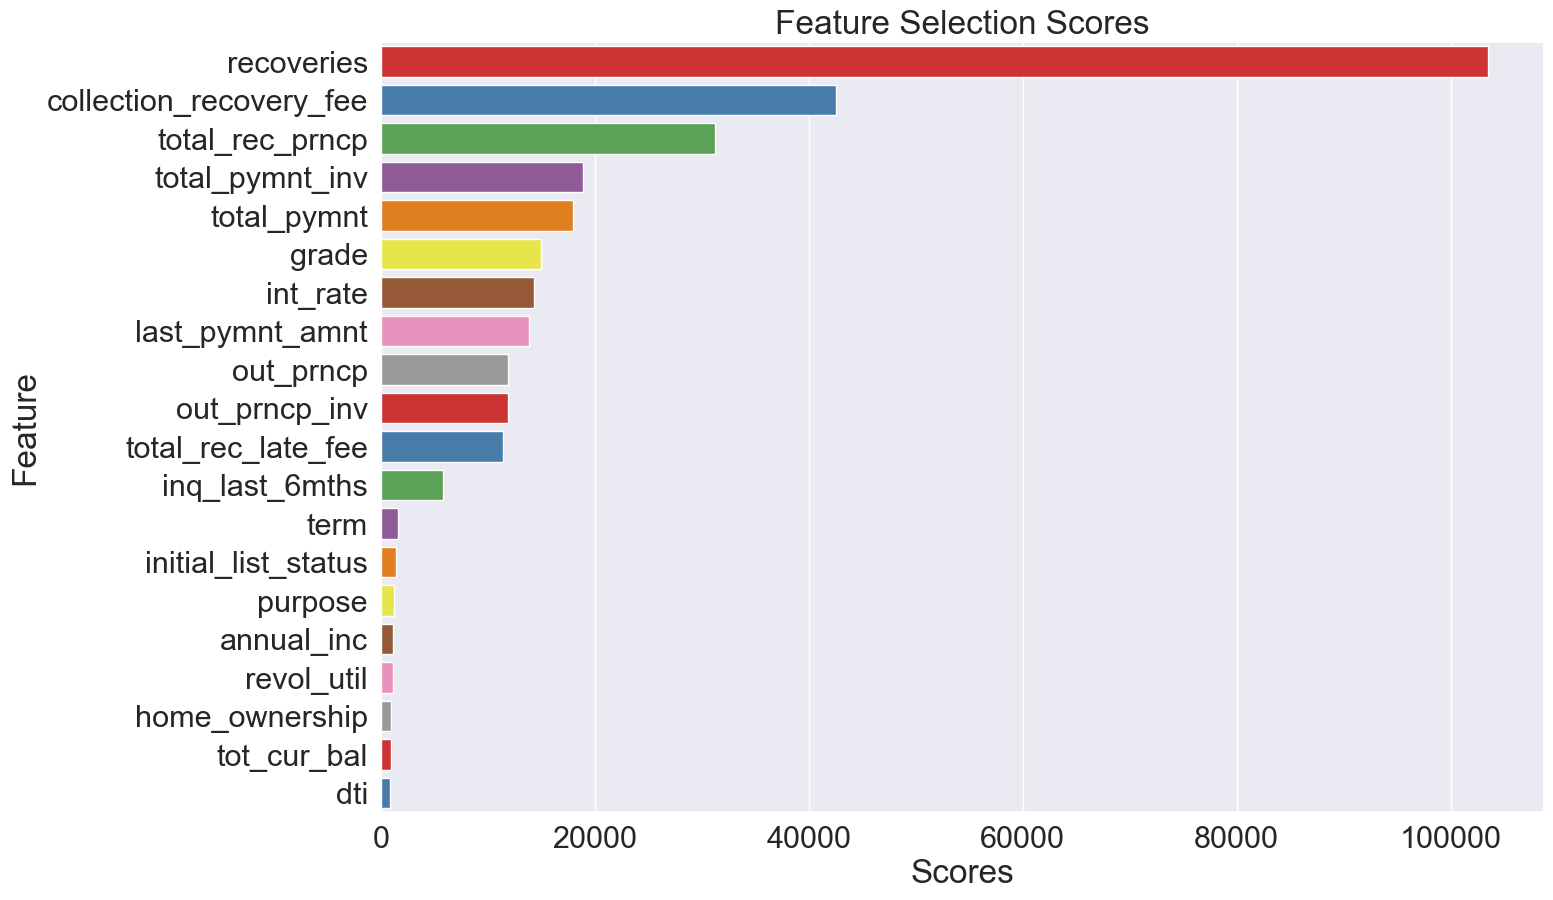

In [27]:
plt.figure(figsize=(15, 10))
sns.barplot(y = "Feature", x = "Scores", data = selected.head(20), palette = "Set1")
plt.title("Feature Selection Scores")
plt.show()

In [28]:
# Selecting Features with score more than 1000
X = X[selected[selected["Scores"] > 500]["Feature"].to_list()]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   recoveries               466285 non-null  float64
 1   collection_recovery_fee  466285 non-null  float64
 2   total_rec_prncp          466285 non-null  float64
 3   total_pymnt_inv          466285 non-null  float64
 4   total_pymnt              466285 non-null  float64
 5   grade                    466285 non-null  int32  
 6   int_rate                 466285 non-null  float64
 7   last_pymnt_amnt          466285 non-null  float64
 8   out_prncp                466285 non-null  float64
 9   out_prncp_inv            466285 non-null  float64
 10  total_rec_late_fee       466285 non-null  float64
 11  inq_last_6mths           466285 non-null  float64
 12  term                     466285 non-null  int32  
 13  initial_list_status      466285 non-null  int32  
 14  purp

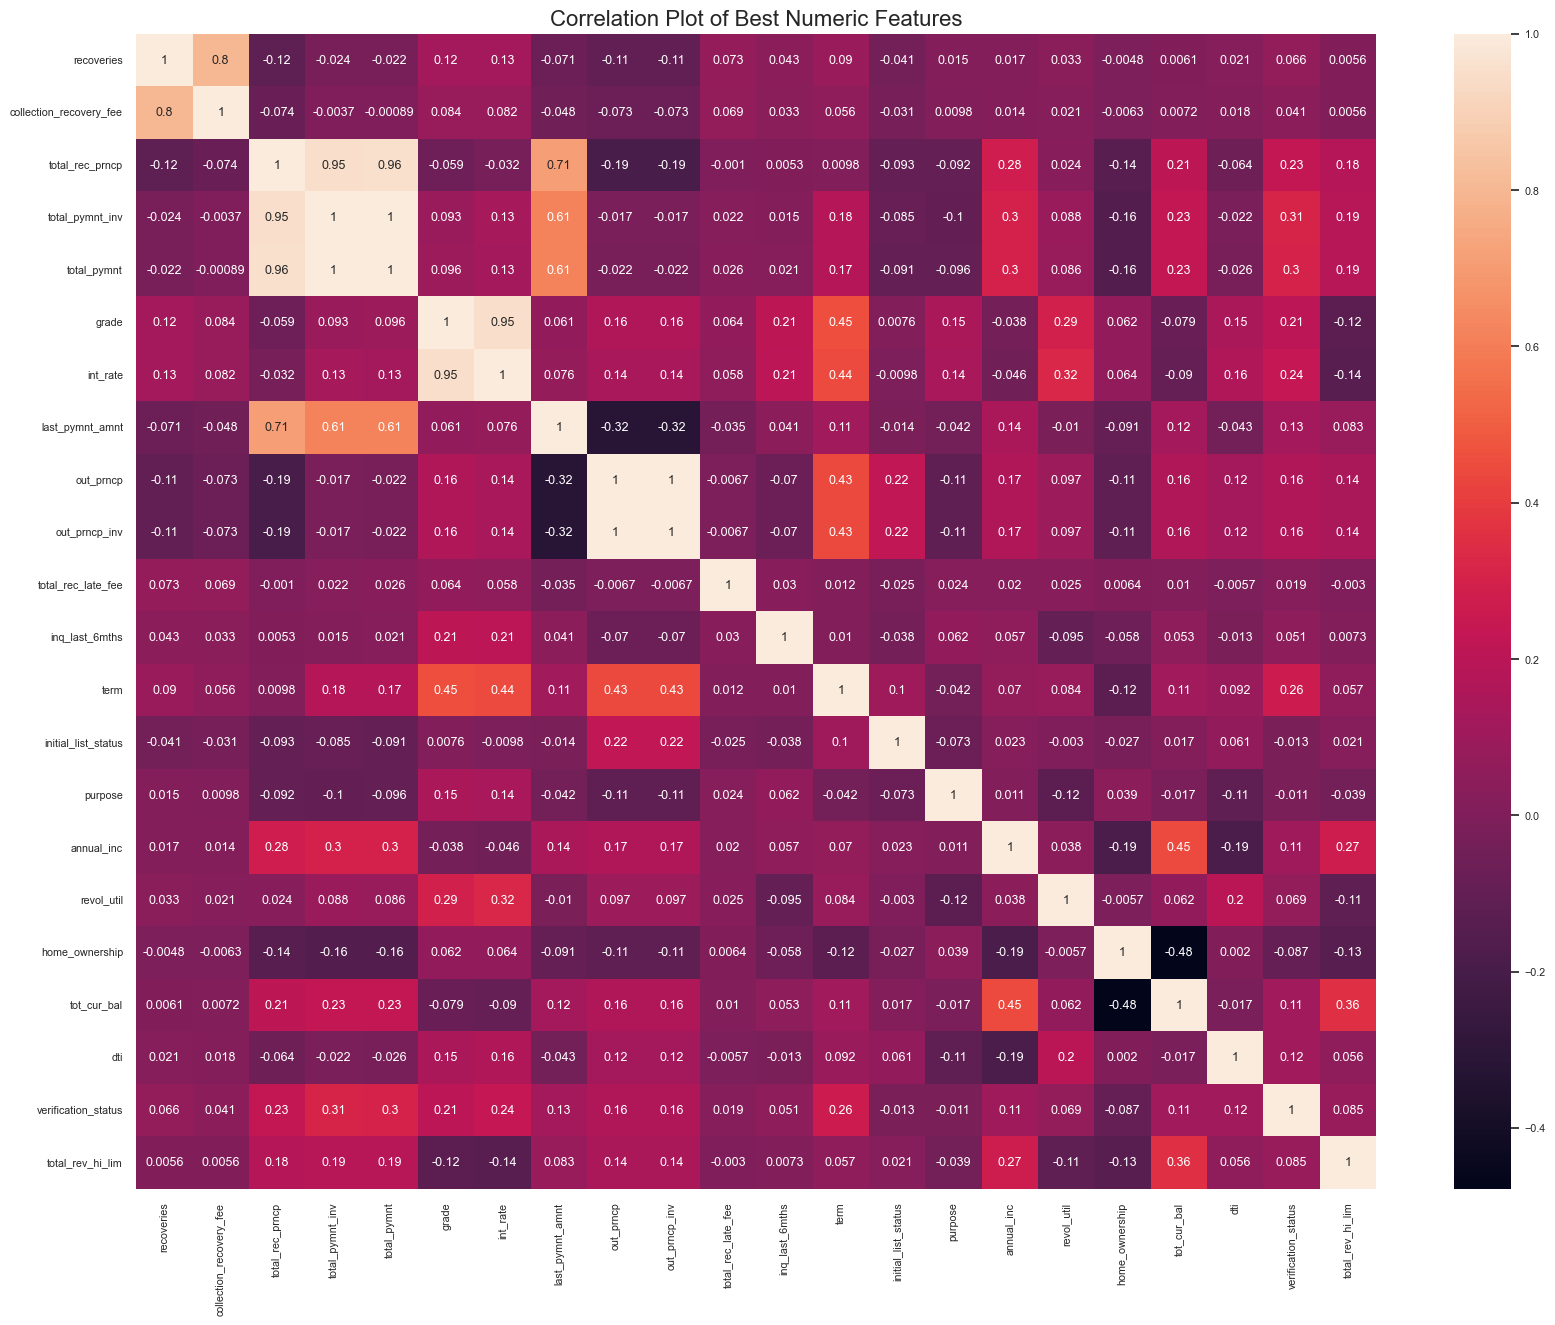

In [39]:
# Extract numeric columns from the dataset
X_num = X[X.select_dtypes(include=np.number).columns.tolist()]
# Create a figure for the heatmap with a specified size
plt.figure(figsize=(20, 15))
# Create a heatmap to visualize the correlation matrix of numeric features
heatmap = sns.heatmap(X_num.corr(), annot=True, annot_kws={"size": 9})
# Set the title for the heatmap with a specified fontsize
heatmap.set_title("Correlation Plot of Best Numeric Features", fontsize=16)
# Display the heatmap
plt.show()

# Modelling and Evaluation

### Without Balancing

In [49]:
# Splitting the dataset into training and testing sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=500)

### Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.57      0.72     10929
           1       0.95      1.00      0.97     82328

    accuracy                           0.95     93257
   macro avg       0.96      0.78      0.84     93257
weighted avg       0.95      0.95      0.94     93257



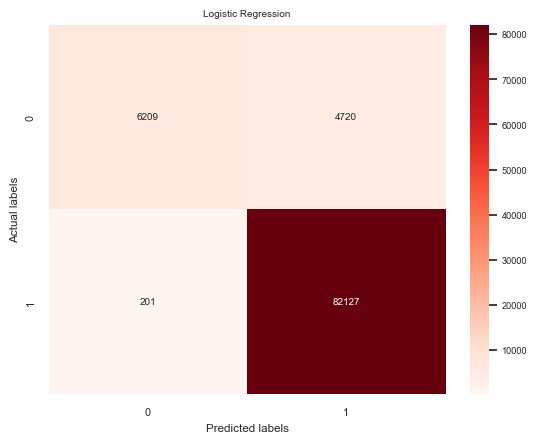

In [50]:
# Create a logistic regression model with a maximum iteration limit of 500
regression_model = LogisticRegression(max_iter=500)
# Train the model on the training data
regression_model.fit(Xtrain, Ytrain)
# Perform predictions on the testing data
Ypred = regression_model.predict(Xtest)
# Calculate the confusion matrix
cm = confusion_matrix(Ytest, Ypred)
# Create a heatmap for the confusion matrix
fig, ax = plt.subplots()
sns.set(font_scale= 0.6)
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Logistic Regression')
# Display the classification report
print(classification_report(Ytest, Ypred))

### Random Forest

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     10929
           1       0.98      1.00      0.99     82328

    accuracy                           0.98     93257
   macro avg       0.98      0.91      0.94     93257
weighted avg       0.98      0.98      0.98     93257



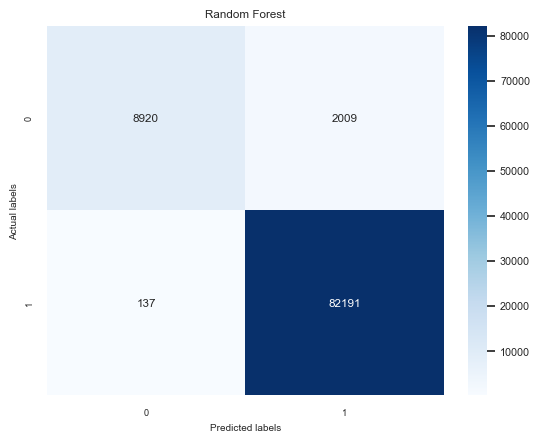

In [51]:
# Create a Random Forest Classifier with 100 estimators and fit it to the training data
RFC = RandomForestClassifier(n_estimators=100).fit(Xtrain, Ytrain)
# Predict the labels for the test data using the trained model
Ypred = RFC.predict(Xtest)
# Create a confusion matrix to evaluate the model's performance
cm = confusion_matrix(Ytest, Ypred)
# Create a figure and axis for plotting the confusion matrix
fig, ax = plt.subplots()
# Set the font scale for the heatmap
sns.set(font_scale=0.7)
# Create a heatmap of the confusion matrix with annotations
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
# Set labels and title for the plot
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Random Forest')
# Print the classification report to evaluate the model's performance
print(classification_report(Ytest, Ypred))

### Gradient Boosting Machine

              precision    recall  f1-score   support

           0       0.97      0.72      0.83     10929
           1       0.96      1.00      0.98     82328

    accuracy                           0.96     93257
   macro avg       0.97      0.86      0.90     93257
weighted avg       0.96      0.96      0.96     93257



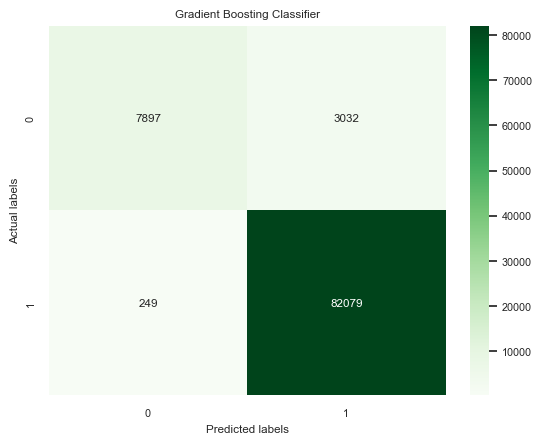

In [52]:
# Create a Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
# Train the model on the training data
gbm_model.fit(Xtrain, Ytrain)
# Perform predictions on the testing data
Ypred = gbm_model.predict(Xtest)
# Calculate the confusion matrix
cm = confusion_matrix(Ytest, Ypred)
# Create a heatmap for the confusion matrix
fig, ax = plt.subplots()
sns.set(font_scale=0.7)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Gradient Boosting Classifier')
# Display the classification report
print(classification_report(Ytest, Ypred))

### Evaluation

In [57]:
# Calculate predicted probabilities for each model
Ypred_proba_logreg = regression_model.predict_proba(Xtest)[::, 1]
Ypred_proba_gbm = gbm_model.predict_proba(Xtest)[::, 1]
Ypred_proba_rfc = RFC.predict_proba(Xtest)[::, 1]

# Calculate AUC scores for each model
auc_logreg = metrics.roc_auc_score(Ytest, Ypred_proba_logreg)
auc_gbm = metrics.roc_auc_score(Ytest, Ypred_proba_gbm)
auc_rfc = metrics.roc_auc_score(Ytest, Ypred_proba_rfc)

# Create a DataFrame to store AUC scores and corresponding methods
auc_df = pd.DataFrame({
    "Methods": ["Logistic Regression", "Gradient Boosting Machine", "Random Forest"],
    "AUC Score": [auc_logreg, auc_gbm, auc_rfc]
})

# Display the AUC scores DataFrame
auc_df

,Methods,AUC Score
0,Logistic Regression,0.921589
1,Gradient Boosting Machine,0.954748
2,Random Forest,0.967511


### With Balancing Data (SMOTE)

In [58]:
# Create an instance of the SMOTE class with a specific random state (for reproducibility).
smth = SMOTE(random_state=2)
# Apply the SMOTE technique to oversample the training data.
Xtrain_res, Ytrain_res = smth.fit_resample(Xtrain, Ytrain)

In [59]:
# Create a boolean array Y0 that checks if each element in Ytrain is equal to 0.
Y0 = Ytrain == 0
# Create a boolean array Y1 that checks if each element in Ytrain is equal to 1.
Y1 = Ytrain == 1
# Print the counts of label '0' before oversampling.
print("Before OverSampling, counts of label '0': {}".format(Y0.sum()))
# Print the counts of label '1' before oversampling.
print("Before OverSampling, counts of label '1': {}".format(Y1.sum()))
# Assuming Ytrain_res is the result of oversampling, create a boolean array Y0 that checks if each element in Ytrain_res is equal to 0.
Y0 = Ytrain_res == 0
# Assuming Ytrain_res is the result of oversampling, create a boolean array Y1 that checks if each element in Ytrain_res is equal to 1.
Y1 = Ytrain_res == 1
# Print the counts of label '0' after oversampling.
print("After OverSampling, counts of label '0': {}".format(Y0.sum()))
# Print the counts of label '1' after oversampling.
print("After OverSampling, counts of label '1': {}".format(Y1.sum()))

Before OverSampling, counts of label '0': 43245
Before OverSampling, counts of label '1': 329783
After OverSampling, counts of label '0': 329783
After OverSampling, counts of label '1': 329783


### Logistic Regression

              precision    recall  f1-score   support

           0       0.48      0.82      0.61     10929
           1       0.97      0.88      0.93     82328

    accuracy                           0.88     93257
   macro avg       0.73      0.85      0.77     93257
weighted avg       0.92      0.88      0.89     93257



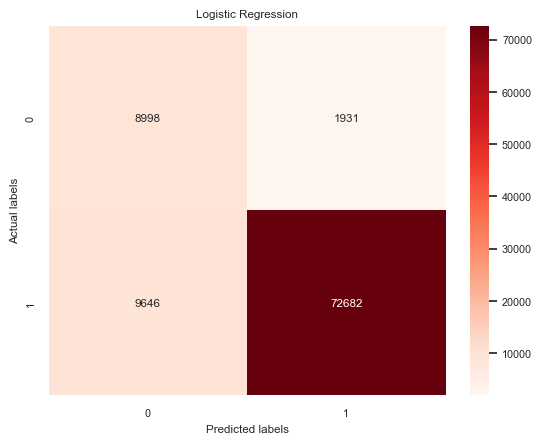

In [60]:
# Import the LogisticRegression class from a machine learning library, assuming it's already imported.
regression_model = LogisticRegression(max_iter=500)
# Fit the logistic regression model using the oversampled training data (Xtrain_res and Ytrain_res).
regression_model.fit(Xtrain_res, Ytrain_res)
# Use the trained model to make predictions on the test data (Xtest).
Ypred = regression_model.predict(Xtest)
# Compute the confusion matrix to evaluate the model's performance.
cm = confusion_matrix(Ytest, Ypred)
# Create a heatmap visualization of the confusion matrix using Seaborn..
fig, ax = plt.subplots()
sns.set(font_scale=0.7)  
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')  
ax.set_xlabel('Predicted labels')  
ax.set_ylabel('Actual labels')  
ax.set_title('Logistic Regression')  
# Print a classification report, which provides additional evaluation metrics like precision, recall, and F1-score.
print(classification_report(Ytest, Ypred))

### Random Forest

              precision    recall  f1-score   support

           0       0.92      0.85      0.89     10929
           1       0.98      0.99      0.99     82328

    accuracy                           0.97     93257
   macro avg       0.95      0.92      0.94     93257
weighted avg       0.97      0.97      0.97     93257



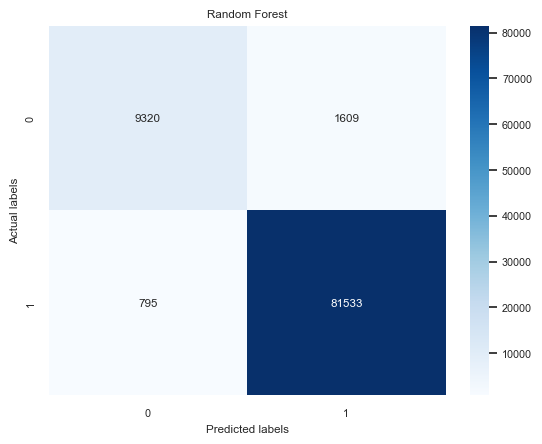

In [61]:
# Import the RandomForestClassifier class from a machine learning library, assuming it's already imported.
RFC = RandomForestClassifier(n_estimators=100).fit(Xtrain_res, Ytrain_res)
# Use the trained Random Forest classifier to make predictions on the test data (Xtest).
Ypred = RFC.predict(Xtest)
# Compute the confusion matrix to evaluate the model's performance.
cm = confusion_matrix(Ytest, Ypred)
# Create a heatmap visualization of the confusion matrix using Seaborn.
fig, ax = plt.subplots()
sns.set(font_scale=0.7)  
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g') 
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('Actual labels') 
ax.set_title('Random Forest')  
# Print a classification report, which provides additional evaluation metrics like precision, recall, and F1-score.
print(classification_report(Ytest, Ypred))

### Gradient Boosting Machine

              precision    recall  f1-score   support

           0       0.80      0.82      0.81     10929
           1       0.98      0.97      0.97     82328

    accuracy                           0.95     93257
   macro avg       0.89      0.89      0.89     93257
weighted avg       0.95      0.95      0.95     93257



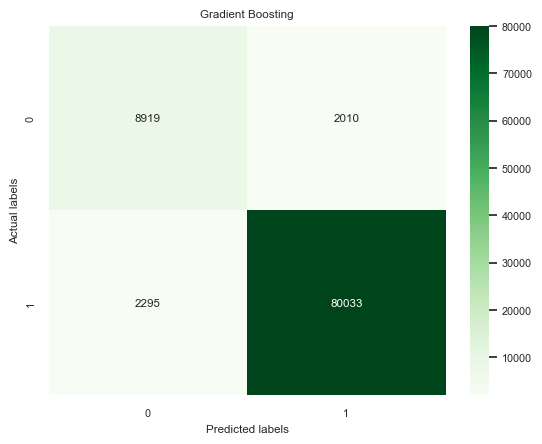

In [62]:
# Create a Gradient Boosting classifier with specified hyperparameters (you can adjust these as needed).
GBM = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3).fit(Xtrain_res, Ytrain_res)
# Use the trained GBM classifier to make predictions on the test data (Xtest).
Ypred = GBM.predict(Xtest)
# Compute the confusion matrix to evaluate the model's performance.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, Ypred)
# Create a heatmap visualization of the confusion matrix using Seaborn.
fig, ax = plt.subplots()
sns.set(font_scale=0.7)  
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g') 
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('Actual labels') 
ax.set_title('Gradient Boosting')  
# Print a classification report, which provides additional evaluation metrics like precision, recall, and F1-score.
print(classification_report(Ytest, Ypred))

### Evaluation

In [63]:
# Calculate predicted probabilities for each model
Ypred_proba_logreg = regression_model.predict_proba(Xtest)[::, 1]
Ypred_proba_gbm = gbm_model.predict_proba(Xtest)[::, 1]
Ypred_proba_rfc = RFC.predict_proba(Xtest)[::, 1]

# Calculate AUC scores for each model
auc_logreg = metrics.roc_auc_score(Ytest, Ypred_proba_logreg)
auc_gbm = metrics.roc_auc_score(Ytest, Ypred_proba_gbm)
auc_rfc = metrics.roc_auc_score(Ytest, Ypred_proba_rfc)

# Create a DataFrame to store AUC scores and corresponding methods
auc_df = pd.DataFrame({
    "Methods": ["Logistic Regression", "Gradient Boosting Machine", "Random Forest"],
    "AUC Score": [auc_logreg, auc_gbm, auc_rfc]
})

# Display the AUC scores DataFrame
auc_df

,Methods,AUC Score
0,Logistic Regression,0.923870
1,Gradient Boosting Machine,0.954748
2,Random Forest,0.971453


### With Balancing Data (Random Under Sampling (RUS))

In [64]:
# Create an instance of the RandomUnderSampler class with a specific random state (for reproducibility)
rus = RandomUnderSampler(random_state=2)
# Apply the Random Under-Sampling technique to the training data
Xtrain_res, Ytrain_res = rus.fit_resample(Xtrain, Ytrain)

In [65]:
# Create a boolean array Y0 that checks if each element in Ytrain is equal to 0.
Y0 = Ytrain == 0
# Create a boolean array Y1 that checks if each element in Ytrain is equal to 1.
Y1 = Ytrain == 1
# Print the counts of label '0' before oversampling.
print("Before OverSampling, counts of label '0': {}".format(Y0.sum()))
# Print the counts of label '1' before oversampling.
print("Before OverSampling, counts of label '1': {}".format(Y1.sum()))
# Assuming Ytrain_res is the result of oversampling, create a boolean array Y0 that checks if each element in Ytrain_res is equal to 0.
Y0 = Ytrain_res == 0
# Assuming Ytrain_res is the result of oversampling, create a boolean array Y1 that checks if each element in Ytrain_res is equal to 1.
Y1 = Ytrain_res == 1
# Print the counts of label '0' after oversampling.
print("After OverSampling, counts of label '0': {}".format(Y0.sum()))
# Print the counts of label '1' after oversampling.
print("After OverSampling, counts of label '1': {}".format(Y1.sum()))

Before OverSampling, counts of label '0': 43245
Before OverSampling, counts of label '1': 329783
After OverSampling, counts of label '0': 43245
After OverSampling, counts of label '1': 43245


### Logistic Regression

              precision    recall  f1-score   support

           0       0.47      0.83      0.60     10929
           1       0.97      0.88      0.92     82328

    accuracy                           0.87     93257
   macro avg       0.72      0.85      0.76     93257
weighted avg       0.92      0.87      0.89     93257



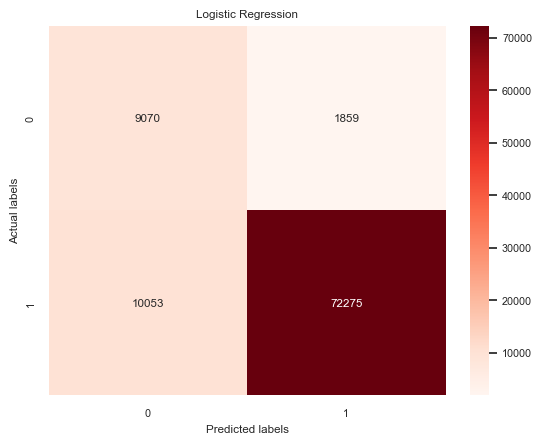

In [66]:
# Import the LogisticRegression class from a machine learning library, assuming it's already imported.
regression_model = LogisticRegression(max_iter=500)
# Fit the logistic regression model using the oversampled training data (Xtrain_res and Ytrain_res).
regression_model.fit(Xtrain_res, Ytrain_res)
# Use the trained model to make predictions on the test data (Xtest).
Ypred = regression_model.predict(Xtest)
# Compute the confusion matrix to evaluate the model's performance.
cm = confusion_matrix(Ytest, Ypred)
# Create a heatmap visualization of the confusion matrix using Seaborn..
fig, ax = plt.subplots()
sns.set(font_scale=0.7)  
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')  
ax.set_xlabel('Predicted labels')  
ax.set_ylabel('Actual labels')  
ax.set_title('Logistic Regression')  
# Print a classification report, which provides additional evaluation metrics like precision, recall, and F1-score.
print(classification_report(Ytest, Ypred))

### Random Forest

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     10929
           1       0.98      0.97      0.98     82328

    accuracy                           0.96     93257
   macro avg       0.89      0.92      0.91     93257
weighted avg       0.96      0.96      0.96     93257



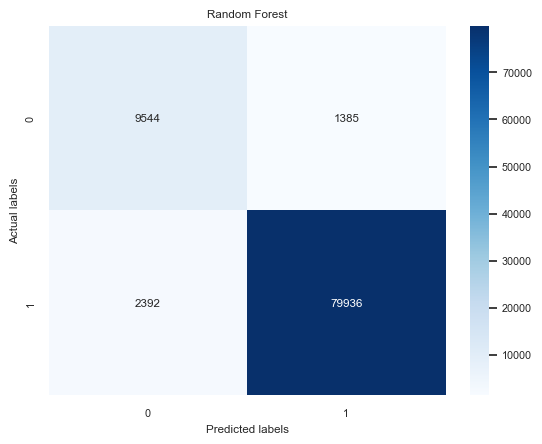

In [67]:
# Import the RandomForestClassifier class from a machine learning library, assuming it's already imported.
RFC = RandomForestClassifier(n_estimators=100).fit(Xtrain_res, Ytrain_res)
# Use the trained Random Forest classifier to make predictions on the test data (Xtest).
Ypred = RFC.predict(Xtest)
# Compute the confusion matrix to evaluate the model's performance.
cm = confusion_matrix(Ytest, Ypred)
# Create a heatmap visualization of the confusion matrix using Seaborn.
fig, ax = plt.subplots()
sns.set(font_scale=0.7)  
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g') 
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('Actual labels') 
ax.set_title('Random Forest')  
# Print a classification report, which provides additional evaluation metrics like precision, recall, and F1-score.
print(classification_report(Ytest, Ypred))

### Gradient Boosting Machine

              precision    recall  f1-score   support

           0       0.73      0.84      0.78     10929
           1       0.98      0.96      0.97     82328

    accuracy                           0.94     93257
   macro avg       0.85      0.90      0.87     93257
weighted avg       0.95      0.94      0.95     93257



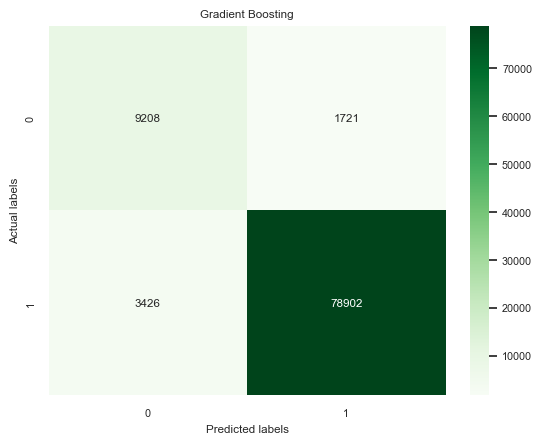

In [68]:
# Create a Gradient Boosting classifier with specified hyperparameters (you can adjust these as needed).
GBM = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3).fit(Xtrain_res, Ytrain_res)
# Use the trained GBM classifier to make predictions on the test data (Xtest).
Ypred = GBM.predict(Xtest)
# Compute the confusion matrix to evaluate the model's performance.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Ytest, Ypred)
# Create a heatmap visualization of the confusion matrix using Seaborn.
fig, ax = plt.subplots()
sns.set(font_scale=0.7)  
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g') 
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('Actual labels') 
ax.set_title('Gradient Boosting')  
# Print a classification report, which provides additional evaluation metrics like precision, recall, and F1-score.
print(classification_report(Ytest, Ypred))

### Evaluation

In [69]:
# Calculate predicted probabilities for each model
Ypred_proba_logreg = regression_model.predict_proba(Xtest)[::, 1]
Ypred_proba_gbm = gbm_model.predict_proba(Xtest)[::, 1]
Ypred_proba_rfc = RFC.predict_proba(Xtest)[::, 1]

# Calculate AUC scores for each model
auc_logreg = metrics.roc_auc_score(Ytest, Ypred_proba_logreg)
auc_gbm = metrics.roc_auc_score(Ytest, Ypred_proba_gbm)
auc_rfc = metrics.roc_auc_score(Ytest, Ypred_proba_rfc)

# Create a DataFrame to store AUC scores and corresponding methods
auc_df = pd.DataFrame({
    "Methods": ["Logistic Regression", "Gradient Boosting Machine", "Random Forest"],
    "AUC Score": [auc_logreg, auc_gbm, auc_rfc]
})

# Display the AUC scores DataFrame
auc_df

,Methods,AUC Score
0,Logistic Regression,0.924521
1,Gradient Boosting Machine,0.954748
2,Random Forest,0.968840
